# MARINE HEATWAVE DATA
__What are marine heatwaves?__

 _Marine heatwaves are periods of extremely high temperatures in the ocean (above the 90th percentile).These events cause habitat destruction due to coral bleaching, seagrass destruction, and loss of kelp forests, affecting the fisheries sector adversely. An underwater survey showed that 85% of the corals in the Gulf of Mannar near the Tamil Nadu coast got bleached after the marine heatwave in May 2020. Though recent studies have reported their occurrence and impacts in the global oceans, they are least understood in the tropical Indian Ocean._

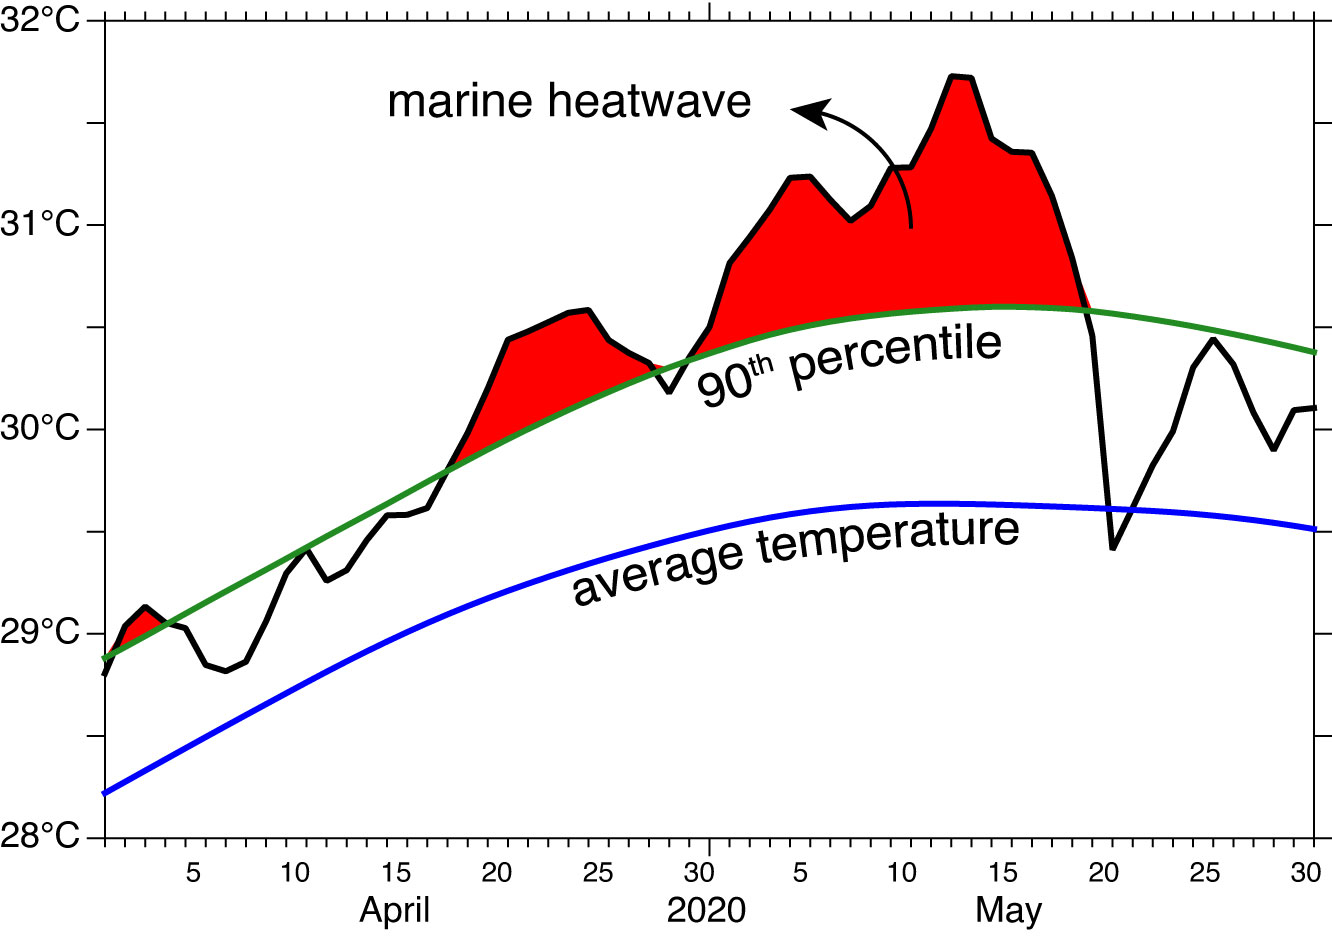

   _Marine heatwaves are periods of extremely high temperatures in the ocean (above the 90th percentile of sea surface temperatures)_

In [56]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt

In [3]:
dataset = xr.open_dataset("subset.nc", engine="netcdf4")

In [4]:
dataset

<xarray.Dataset>
Dimensions:  (time: 14611, lat: 100, lon: 160)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2021-09-01
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
  * lon      (lon) float32 60.12 60.38 60.62 60.88 ... 99.12 99.38 99.62 99.88
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    history:        Fri Jul 22 22:44:49 2022: ncrcat -O -d time,1981-09-01 00...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [6]:
sst=dataset.sst

In [8]:
Time=dataset.sst.time[:14368].data      #1D ##removin year 2021 from the data
Latitude=dataset.sst.lat.data     #1D
Longitude=dataset.sst.lon.data    #1D
sea_surface_temp=dataset.sst.data 

In [14]:
TimeDF=pd.DataFrame(Time,columns=['Time'])
TimeDF

,Time
0,1981-09-01
1,1981-09-02
2,1981-09-03
3,1981-09-04
4,1981-09-05
...,...
14363,2020-12-28
14364,2020-12-29
14365,2020-12-30
14366,2020-12-31


In [15]:
sea_surface_tempDF=pd.DataFrame(sea_surface_temp[:14368,0,0],columns=['sea_surface_temp'])
sea_surface_tempDF

,sea_surface_temp
0,29.019999
1,28.869999
2,28.799999
3,28.150000
4,28.109999
...,...
14363,28.359999
14364,28.490000
14365,28.689999
14366,28.779999


In [16]:
time_sst=pd.concat([TimeDF,sea_surface_tempDF],axis=1)
time_sst

,Time,sea_surface_temp
0,1981-09-01,29.019999
1,1981-09-02,28.869999
2,1981-09-03,28.799999
3,1981-09-04,28.150000
4,1981-09-05,28.109999
...,...,...
14363,2020-12-28,28.359999
14364,2020-12-29,28.490000
14365,2020-12-30,28.689999
14366,2020-12-31,28.779999


In [17]:
## Finding 90 percentile for each lat,lon pair and storing in a list,further we will convert this list into 2d dataframe 
percentile_list=[]
for i in range(0,100):
    for j in range(0,160):
        percentile_list.append(np.percentile(dataset.sst[:14368,i,j].data,90))


In [19]:
nintey_percentile=np.array(percentile_list).reshape(100,160) #reshaping into original format
nintey_percentile
       

array([[30.1099987 , 30.11999893, 30.11999893, ..., 30.45999908,
        30.46999931,         nan],
       [30.1099987 , 30.1099987 , 30.11999893, ...,         nan,
                nan,         nan],
       [30.1099987 , 30.1099987 , 30.1099987 , ...,         nan,
                nan,         nan],
       ...,
       [30.50300007, 30.32999992, 30.15999985, ...,         nan,
                nan,         nan],
       [30.56999969, 30.4299984 , 30.27999878, ...,         nan,
                nan,         nan],
       [30.63999939, 30.51999855, 30.39999962, ...,         nan,
                nan,         nan]])

Hence we got the value of 90 percentile with the help of lat 40 year data for everylat lon pair(1981-2020)


In [25]:
dataset21=xr.open_dataset("sst.day.mean.2021.nc", engine="netcdf4") ## SST data for 2021
    
sst21=dataset21.sst.sel(lon=slice(60,100),lat=slice(0,25)) ##Indian Ocean Slicing
    

In [26]:
## marking boolean for all sst greater then 90 percentile
x=[]
for k in range(len(sst21.time.data)):
    x.append(np.greater(sst21[k].data,nintey_percentile))
        

In [99]:
np.array(x)

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [29]:
## converting 2d list into 3d array and bool into binary(1,0)
logic_mhw=np.array(x).astype(int)
logic_mhw  

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [32]:
 ## creating a dataArray with bool
logic_mhw_xr=xr.DataArray(logic_mhw, coords=[("time",sst21.time.data),("lat", Latitude), ("lon", Longitude)])
logic_mhw_xr

<xarray.DataArray (time: 365, lat: 100, lon: 160)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
  * lon      (lon) float32 60.12 60.38 60.62 60.88 ... 99.12 99.38 99.62 99.88

In [33]:
 ## converting in time series

new_table=pd.concat([pd.DataFrame(logic_mhw_xr.time.data,columns=['Time']),pd.DataFrame(logic_mhw[:,0,0],columns=['logic_mhw'])],axis=1)
new_table
    

,Time,logic_mhw
0,2021-01-01,0
1,2021-01-02,0
2,2021-01-03,0
3,2021-01-04,0
4,2021-01-05,0
...,...,...
360,2021-12-27,0
361,2021-12-28,0
362,2021-12-29,0
363,2021-12-30,0


In [105]:
new_table['logic_mhw'][0]

0

In [34]:
new_table['logic_mhw'].value_counts() ## value greater then 5 henve there is chance of detecting mhw


0    339
1     26
Name: logic_mhw, dtype: int64

<AxesSubplot:xlabel='Time'>

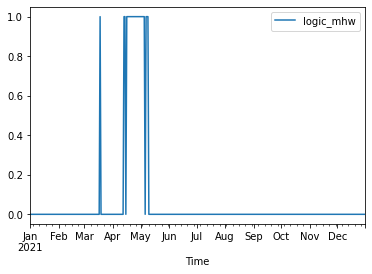

In [35]:
new_table.plot(x='Time',y='logic_mhw',kind='line')

In [119]:
index=0
count=0
for i in new_table['logic_mhw']:
    if i==1:
        count+=1
        index+=1
        if count==5:
            print(new_table['Time'][index])
            
        
    if i==0:
        index+=1
        count=0

2021-04-21 00:00:00


In [113]:
sst.sel(time=slice('2021-04-16','2021-05-06')).mean(dim='time')

<xarray.DataArray 'sst' (lat: 100, lon: 160)>
array([[30.554287, 30.52333 , 30.512856, ..., 30.529997, 30.53857 ,
              nan],
       [30.576666, 30.54238 , 30.521427, ...,       nan,       nan,
              nan],
       [30.578096, 30.543812, 30.528574, ...,       nan,       nan,
              nan],
       ...,
       [28.957619, 28.92143 , 28.939999, ...,       nan,       nan,
              nan],
       [28.95095 , 28.868097, 28.845242, ...,       nan,       nan,
              nan],
       [28.950474, 28.868092, 28.800003, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
  * lon      (lon) float32 60.12 60.38 60.62 60.88 ... 99.12 99.38 99.62 99.88

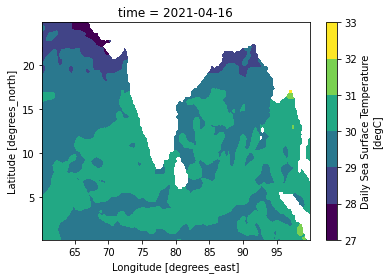

In [123]:
xr.plot.contourf(sst.sel(time=('2021-04-16')))

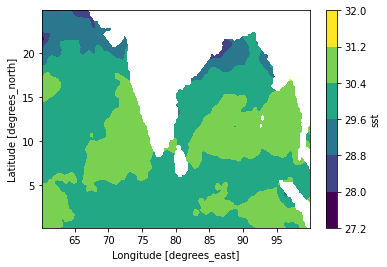

In [124]:
xr.plot.contourf(sst.sel(time=slice('2021-04-16','2021-05-06')).mean(dim='time'))

### Code for Marine heatwave at coordinate(lat,lon)

In [125]:
def mhw(u,v):
    dataset = xr.open_dataset("subset.nc", engine="netcdf4")
    
    Time=dataset.sst.time[:14368].data      #1D ##removin year 2021 from the data
    Latitude=dataset.sst.lat.data     #1D
    Longitude=dataset.sst.lon.data    #1D
    sea_surface_temp=dataset.sst.data 
    
    TimeDF=pd.DataFrame(Time,columns=['Time'])
    sea_surface_tempDF=pd.DataFrame(sea_surface_temp[:14368,u,v],columns=['sea_surface_temp'])
    time_sst=pd.concat([TimeDF,sea_surface_tempDF],axis=1)
    
    
    ## Finding 90 percentile for each lat,lon pair and storing in a list,further we will convert this list into 2d array 
    percentile_list=[]
    for i in range(0,100):
        for j in range(0,160):
            percentile_list.append(np.percentile(dataset.sst[:14368,i,j].data,90))
            
            
    nintey_percentile=np.array(percentile_list).reshape(100,160) #reshaping into original format
    ## Hence we got the value of 90 percentile with the help of lat 40 year data for everylat lon pair(1981-2020)
    
    dataset21=xr.open_dataset("sst.day.mean.2021.nc", engine="netcdf4") ## SST data for 2021
    
    datasetsst21=dataset21.sst.sel(lon=slice(60,100),lat=slice(0,25)) ##Indian Ocean Slicing
    
    ## marking boolean for all sst greater then 90 percentile
    x=[]
    for k in range(len(datasetsst21.time.data)):
        x.append(np.greater(datasetsst21[k].data,nintey_percentile))
        
    ## converting 2d list into 3d array and bool into binary(1,0)
    logic_mhw=np.array(x).astype(int)
    
    ## creating a dataArray with bool
    logic_mhw_xr=xr.DataArray(logic_mhw, coords=[("time",datasetsst21.time.data),("lat", Latitude), ("lon", Longitude)])
    
    ## converting in time series
    new_table=pd.concat([pd.DataFrame(logic_mhw_xr.time.data,columns=['Time']),pd.DataFrame(logic_mhw[:,0,0],columns=['logic_mhw'])],axis=1)
    new_table['logic_mhw'].value_counts() ## value greater then 5 henve there is chance of detecting mhw
    
    ## Date at which marine heat wave started
    index=0
    count=0
    for i in new_table['logic_mhw']:
        if i==1:
            count+=1
            index+=1
            if count==5:
                print(new_table['Time'][index-5])
            
        
        if i==0:
            index+=1
            count=0
    
    new_table.plot(x='Time',y='logic_mhw',kind='line')

2021-04-16 00:00:00


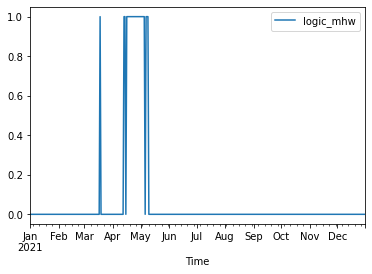

In [126]:
mhw(5,5)

# Plotting

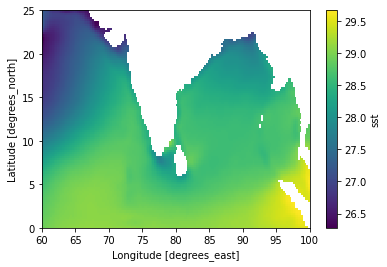

In [37]:
IO.mean(dim='time').plot()

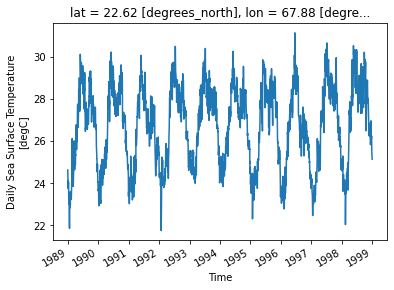

In [48]:
dataset.sst.isel(lat=90, lon=31).sel(time=slice('1989-01-01','1998-12-31')).plot()

In [52]:
##Mean during Monsoon
IO_clim=IO.sel(time=slice('2021-06-21','2021-09-21')).mean(dim='time')
IO_clim

<xarray.DataArray 'sst' (lat: 100, lon: 160)>
array([[28.723433, 28.733288, 28.744656, ..., 29.641241, 29.654795,
              nan],
       [28.697536, 28.72548 , 28.75822 , ...,       nan,       nan,
              nan],
       [28.698082, 28.738628, 28.781507, ...,       nan,       nan,
              nan],
       ...,
       [29.749859, 29.427402, 29.12891 , ...,       nan,       nan,
              nan],
       [29.783966, 29.530554, 29.297804, ...,       nan,       nan,
              nan],
       [29.90918 , 29.690958, 29.515484, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
  * lon      (lon) float32 60.12 60.38 60.62 60.88 ... 99.12 99.38 99.62 99.88

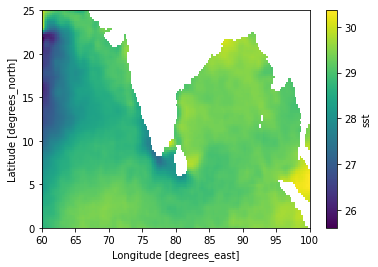

In [53]:
IO_clim.plot()

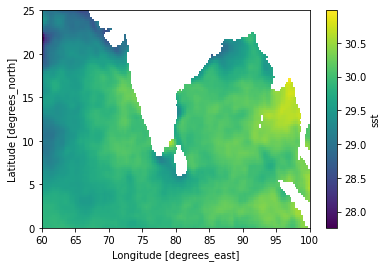

In [54]:
## Mean during Summer
IO_summer=IO.sel(time=slice('2021-03-21','2021-06-21')).mean(dim='time')
IO_summer.plot()

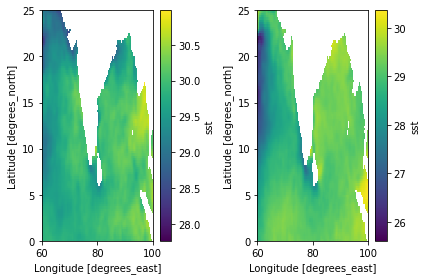

In [59]:
fig, axes = plt.subplots(ncols=2)

axes

## Mean during Summer
IO_summer=IO.sel(time=slice('2021-03-21','2021-06-21')).mean(dim='time')
IO_summer.plot(ax=axes[0])

IO_clim.plot(ax=axes[1])

plt.tight_layout()

plt.draw()

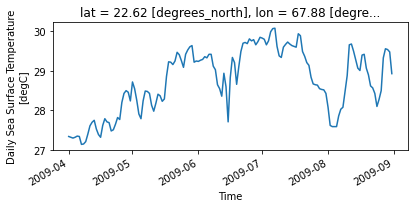

In [62]:
dataset.sst.isel(lat=90, lon=31).sel(time=slice('2009-04-01','2009-08-31')).plot(aspect=2, size=3)

plt.tight_layout()

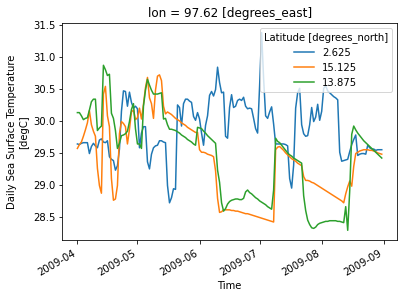

In [75]:
dataset.sst.isel(lon=150, lat=[10, 60, 55]).sel(time=slice('2009-04-01','2009-08-31')).plot.line(x="time")

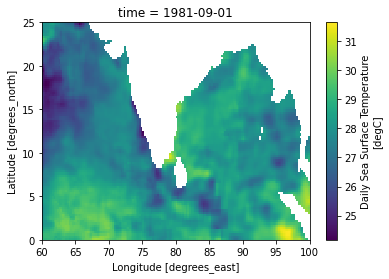

In [78]:
 xr.plot.pcolormesh(sst[0])

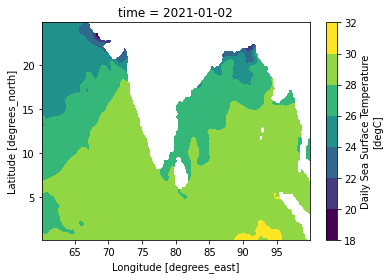

In [101]:
 xr.plot.contourf(sst[14368])

In [100]:
nintey_percentile[0][0]

30.10999870300293

In [87]:
t = sst.isel(time=slice(45,365 * 4,120))

t.coords

Coordinates:
  * time     (time) datetime64[ns] 1981-10-16 1982-02-13 ... 1985-05-28
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
  * lon      (lon) float32 60.12 60.38 60.62 60.88 ... 99.12 99.38 99.62 99.88

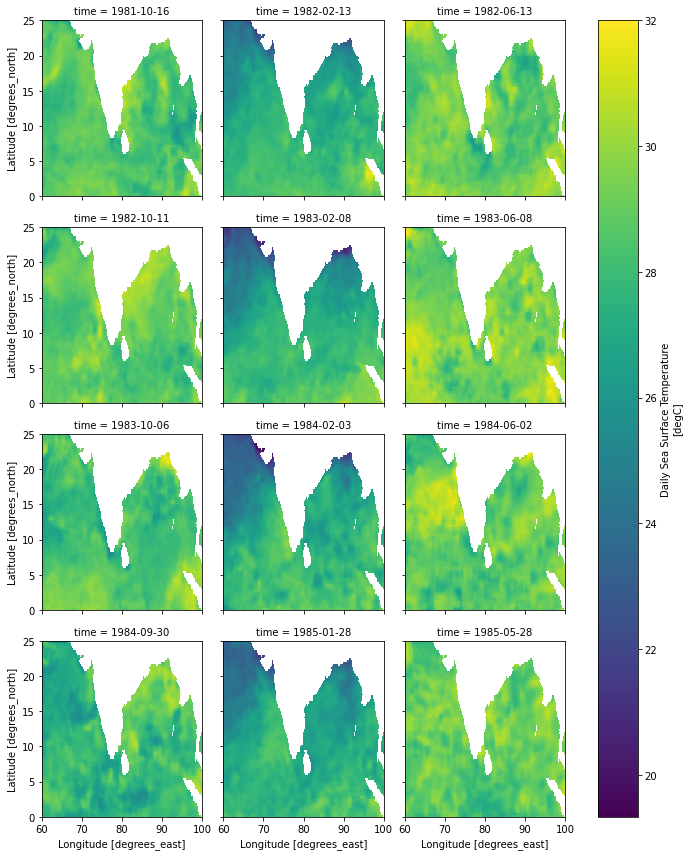

In [88]:
g_simple = t.plot(x="lon", y="lat", col="time", col_wrap=3)

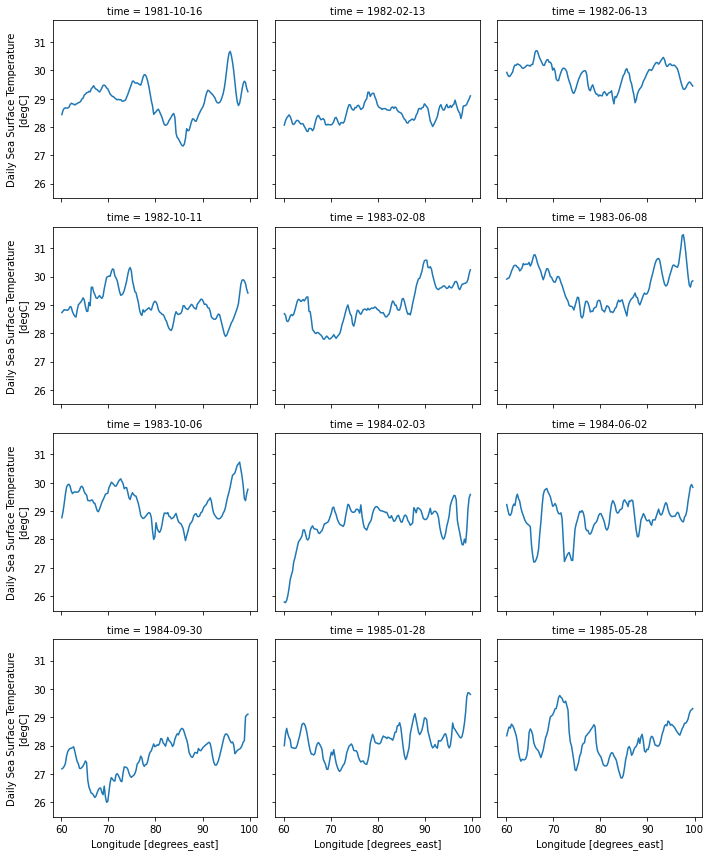

In [89]:
g_simple_line = t.isel(lat=slice(0, None, 100)).plot(
    x="lon", hue="lat", col="time", col_wrap=3
)

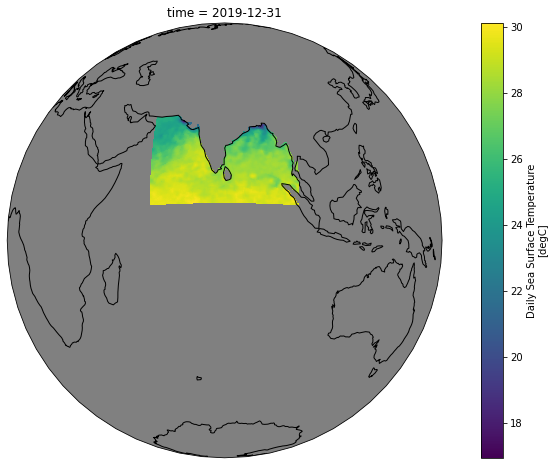

In [95]:
plt.figure(figsize=(14,8))
import cartopy.crs as ccrs
p =  dataset.sst.sel(lon=slice(60,100),lat=slice(0,25)).isel(time=14000).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(80,-10), facecolor="gray"),
    transform=ccrs.PlateCarree(),
)

p.axes.set_global()

p.axes.coastlines()

<Figure size 1440x576 with 0 Axes>

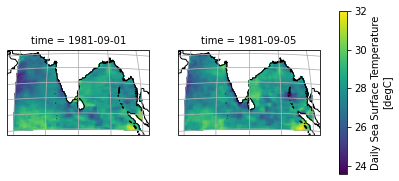

In [98]:
plt.figure(figsize=(20,8))
p = dataset.sst.sel(lon=slice(60,100),lat=slice(0,25)).isel(time=[0, 4]).plot(transform=ccrs.PlateCarree(),
    col="time",
    subplot_kws={"projection": ccrs.Orthographic(80, -10)},
)

for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()
    
plt.draw()